In [147]:
import pandas as pd
import warnings
from sklearn.utils import ConvergenceWarning
import numpy as np
import requests
import re
import os
import glob
import csv
import numpy as np
import scipy, scipy.stats
import sklearn
from sklearn import *
lm=linear_model.LinearRegression()
import statsmodels.formula.api as sm
from itertools import cycle
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
from numpy import genfromtxt
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from  sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [3]:
homedir = os.path.expanduser("~")
path_to_midterm = homedir+"\\midterm"
print("Path: ",path_to_midterm)

Path:  C:\Users\Administrator\midterm


In [4]:
def performance_fillNA(perf_df):
    perf_df['curr_ln_delin_status'] = perf_df['curr_ln_delin_status'].fillna(0)
    perf_df['repurch_flag']=perf_df['repurch_flag'].fillna('Unknown')
    perf_df['mod_flag']=perf_df['mod_flag'].fillna('N')
    perf_df['zero_bal_cd']=perf_df['zero_bal_cd'].fillna(00)
    perf_df['zero_bal_eff_dt']=perf_df['zero_bal_eff_dt'].fillna('199601')
    perf_df['current_dupb']=perf_df['current_dupb'].fillna(0)
    perf_df['lst_pd_inst_duedt']=perf_df['lst_pd_inst_duedt'].fillna('199601')
    perf_df['mi_recoveries']=perf_df['mi_recoveries'].fillna(0)
    perf_df['net_sale_proceeds']=perf_df['net_sale_proceeds'].fillna('U')
    perf_df['non_mi_recoveries']=perf_df['non_mi_recoveries'].fillna(0)
    perf_df['expenses']=perf_df['expenses'].fillna(0)
    perf_df['legal_costs']=perf_df['legal_costs'].fillna(0)
    perf_df['maint_pres_costs']=perf_df['maint_pres_costs'].fillna(0)
    perf_df['taxes_and_insur']=perf_df['taxes_and_insur'].fillna(0)
    perf_df['misc_expenses']=perf_df['misc_expenses'].fillna(0)
    perf_df['actual_loss_calc']=perf_df['actual_loss_calc'].fillna(0)
    perf_df['mod_cost']=perf_df['mod_cost'].fillna(0)
    
    return perf_df

In [5]:
def changeperformancedatatype(perf_df):
        perf_df[['curr_ln_delin_status','loan_age','remng_mon_to_leg_matur','zero_bal_cd','current_dupb',\
                 'actual_loss_calc']] = perf_df[['curr_ln_delin_status','loan_age','remng_mon_to_leg_matur',\
                                                 'zero_bal_cd','current_dupb','actual_loss_calc']].astype('int64')

        perf_df[['mon_rpt_prd','zero_bal_eff_dt','lst_pd_inst_duedt']] = perf_df[['mon_rpt_prd','zero_bal_eff_dt',\
                                                                                  'lst_pd_inst_duedt']].astype('str')
        return perf_df

In [6]:
download_path = path_to_midterm+"\\"+"2005_sample\\" 
def constructperformancecsv():
    print("Started")
    writeHeader1 = True
    filename = "HistoricalperformanceCombined.csv"
    final_sample = pd.DataFrame()
    for subdir,dirs, files in os.walk(download_path):
        for file in files:
            if 'sample_svcg_' in file:
                temp_list = []
                chunksize = 10 ** 6
                for chunk in pd.read_csv(os.path.join(subdir,file) ,sep="|", \
                                         skipinitialspace=True, chunksize=chunksize, low_memory=False, header=None):
                    temp_list.append(chunk)
                print('DataFrame creation started!!')
                frames = []
                for df in temp_list:
                    frames.append(df)
                sample_df = pd.concat(frames)
                sample_df.columns = ['id_loan','mon_rpt_prd','current_aupb','curr_ln_delin_status',\
                                     'loan_age','remng_mon_to_leg_matur', 'repurch_flag','mod_flag', \
                                     'zero_bal_cd', 'zero_bal_eff_dt','current_int_rte','current_dupb',\
                                     'lst_pd_inst_duedt','mi_recoveries', 'net_sale_proceeds',\
                                     'non_mi_recoveries','expenses', 'legal_costs', 'maint_pres_costs',\
                                     'taxes_and_insur','misc_expenses','actual_loss_calc', 'mod_cost']
                print('DataFrame created!!')

                sample_df['curr_ln_delin_status'] = [999 if x=='R' else x for x in \
                                                   (sample_df['curr_ln_delin_status'].apply(lambda x: x))]
                sample_df['curr_ln_delin_status'] = [0 if x=='XX' else x for x in \
                                                   (sample_df['curr_ln_delin_status'].apply(lambda x: x))]
                sample_df = performance_fillNA(sample_df)
                sample_df = changeperformancedatatype(sample_df)
                
                sample_df['Year'] = ['19'+x if x=='99' else '20'+x for x in (sample_df['id_loan'].apply(lambda x: x[2:4]))]
                sample_df['Quarter'] =sample_df['id_loan'].apply(lambda x: x[4:6])
                print("Completed!!")
                
                final_sample=pd.concat([final_sample, sample_df])
    return final_sample


Performance_data=constructperformancecsv()

Started
DataFrame creation started!!
DataFrame created!!
Completed!!


In [7]:
Performance_data.tail()

,id_loan,mon_rpt_prd,current_aupb,curr_ln_delin_status,loan_age,remng_mon_to_leg_matur,repurch_flag,mod_flag,zero_bal_cd,zero_bal_eff_dt,...,non_mi_recoveries,expenses,legal_costs,maint_pres_costs,taxes_and_insur,misc_expenses,actual_loss_calc,mod_cost,Year,Quarter
3574029,F105Q4404780,201508,107846.21,0,117,243,Unknown,N,0,199601,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2005,Q4
3574030,F105Q4404780,201509,107565.45,0,118,242,Unknown,N,0,199601,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2005,Q4
3574031,F105Q4404780,201510,107283.69,0,119,241,Unknown,N,0,199601,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2005,Q4
3574032,F105Q4404780,201511,107000.93,0,120,240,Unknown,N,0,199601,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2005,Q4
3574033,F105Q4404780,201512,0.00,0,121,239,N,N,1,201512.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,2005,Q4


In [8]:
def statusUpdate(df):
    df['delinquent'] = (df.curr_ln_delin_status > 0).astype(int)
    #df.drop('max_curr_ln_delin_status', axis = 1,inplace=True)
    df.drop('curr_ln_delin_status', axis = 1,inplace=True)
    #df.drop('Year',axis=1,inplace=True) #Duplicate
    #df.drop('Quarter',axis=1,inplace=True) #Duplicate
    return df

In [9]:
Performace_data = statusUpdate(Performance_data)


In [120]:
def splitting(df,label):
    df_features = df.ix[:, df.columns != label]
    df_target = df.ix[:, df.columns == label]
    return df_features,df_target

In [54]:
def findCorrelation(df):
    # calculate the correlation matrix
    corr = df.corr()
    print(corr['delinquent'])
    # plot the heatmap
    #sns.heatmap(corr, 
    #        xticklabels=corr.columns,
    #        yticklabels=corr.columns)

In [121]:
def dataSplit(Performace_data,label):
    label = 'delinquent'
    #print(Performace_data.head())
    Hist_numeric_2005_Q1 = Performace_data[(Performace_data['Year']=='2005') & (Performace_data['Quarter']=='Q1')]
    Hist_numeric_2005_Q1=Hist_numeric_2005_Q1._get_numeric_data()
    findCorrelation(Hist_numeric_2005_Q1)

    Hist_numeric_2005_Q2 = Performace_data[(Performace_data['Year']=='2005') & (Performace_data['Quarter']=='Q2')]
    Hist_numeric_2005_Q2=Hist_numeric_2005_Q2._get_numeric_data()
    #print(Hist_numeric_2005_Q2.head())

    Hist_numeric_2005_Q1_features,Hist_numeric_2005_Q1_target = splitting(Hist_numeric_2005_Q1,label)
    Hist_numeric_2005_Q2_features,Hist_numeric_2005_Q2_target = splitting(Hist_numeric_2005_Q2,label)
    return Hist_numeric_2005_Q1_features,Hist_numeric_2005_Q1_target, Hist_numeric_2005_Q2_features,Hist_numeric_2005_Q2_target

In [149]:

traning_feature,traning_label,testing_feature,testing_label=dataSplit(Performace_data,'delinquent')
print("Traning",traning_feature.shape)
print("Testing",testing_feature.shape)

current_aupb              0.013046
loan_age                  0.150777
remng_mon_to_leg_matur    0.018246
zero_bal_cd               0.082250
current_int_rte          -0.024759
current_dupb              0.012682
mi_recoveries             0.044816
non_mi_recoveries         0.022754
expenses                 -0.082486
legal_costs              -0.087452
maint_pres_costs         -0.061489
taxes_and_insur          -0.063170
misc_expenses            -0.052228
actual_loss_calc         -0.088495
mod_cost                  0.013923
delinquent                1.000000
Name: delinquent, dtype: float64
Traning (923079, 15)
Testing (897465, 15)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [154]:




def featureSelectionRFE(selector,data):
    decision = selector.support_
    important_feature = []
    columns = list(data)
    iter=0
    for col in columns:
        if decision[iter]:
            print(col)
            important_feature.append(col)
        iter+=1
    data_new = data.filter(important_feature,axis=1)
    return data_new

In [ ]:
def featureSelectionKSelect(selector,data):
    decision = selector.get_support()
    important_feature = []
    columns = list(data)
    iter=0
    for col in columns:
        if decision[iter]:
            print(col)
            important_feature.append(col)
        iter+=1
    data = data[important_feature]
    return data

In [111]:
list(data)

['current_aupb',
 'loan_age',
 'remng_mon_to_leg_matur',
 'current_dupb',
 'actual_loss_calc']

In [ ]:
def confusionMatrixPrint(acc):
    print("")
    print("----------------------Confusion Matrix--------------------")
    print("                    Actual Result          ")
    print("                   0                  1          ")
    print("Expected  0        ",acc[0][0],"        ",acc[0][1])
    print("")
    print("result    1        ",acc[1][0],"        ",acc[1][1])
    print("")
    

In [ ]:
from sklearn.feature_selection import RFE


def logistic_regressor(traning_feature, traning_label, testing_feature, testing_label):
    logreg = linear_model.LogisticRegression(max_iter=200)
    selector = RFE(logreg, 5, step=1)
    selector.fit(traning_feature, traning_label)
    testing_feature = featureSelectionRFE(selector, testing_feature)
    traning_feature = featureSelectionRFE(selector, traning_feature)
    # we create an instance of Neighbours Classifier and fit the data.
    logreg.fit(traning_feature, traning_label)
    z=logreg.predict(testing_feature)
    cm=confusion_matrix(testing_label,z)
    confusionMatrixPrint(cm)
    fpr, tpr, _ = roc_curve(testing_label,z)
    print(fpr)
    result = np.sum(testing_label.values.flatten() == z)/z.size
    print("Accuracy:",result*100)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
              label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
logistic_regressor(traning_feature, traning_label, testing_feature, testing_label)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
traning_label.values.flatten()

array([0, 0, 0, ..., 0, 0, 0])

Accuracy: 61.6797695539


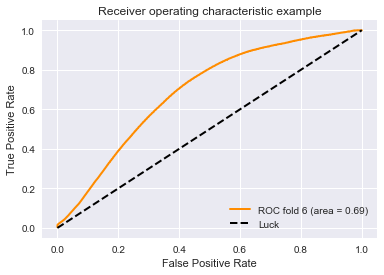

In [98]:

cv = StratifiedKFold(n_splits=6)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
X = pd.concat([traning_feature,testing_feature]).values
y = pd.concat([traning_label,testing_label]).values.flatten()
colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2
classifier = linear_model.LogisticRegression(class_weight='balanced',max_iter=200)
i = 0
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    z=classifier.predict(traning_feature)
    result = np.sum(traning_label.values.flatten() == z)/z.size
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    i += 1

plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (6, roc_auc))

   
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')


print("Accuracy:",result*100)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [52]:
z[0].size

1

In [35]:
y.flatten()

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

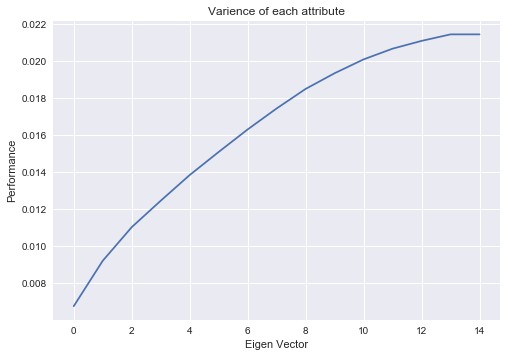

In [19]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

def start(data):
    #data = pd.read_csv("C:/Users\sup33\Downloads/classify_feature_matrix.csv")
    #data=pd.get_dummies(data)
    X = data.values
    X=scale(X)


    #Find the varience
    pca=PCA(n_components=15)
    pca.fit(X)
    var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
    var=pca.explained_variance_
    eigen_val = var
    #var=np.matrix(var).transpose()
    #var=var[::-1]
    #print(var)
    #eigen_val = pca.explained_variance_
    eigen_val=eigen_val/700
    for index in range(1,len(eigen_val)):
        eigen_val[index]+=eigen_val[index-1]
    plt.plot(eigen_val)
    plt.title("Varience of each attribute")
    plt.xlabel("Eigen Vector")
    plt.ylabel("Performance")
    plt.plot()
    plt.show()
start(traning_feature)

[[ -8.00343675e+04   1.29643592e+01]
 [ -8.00343680e+04   1.29635936e+01]
 [ -8.00343686e+04   1.29628280e+01]
 ..., 
 [ -1.14441077e+05   7.89103731e+01]
 [ -1.14881306e+05   7.97577179e+01]
 [ -1.42034345e+05   1.32067850e+02]]


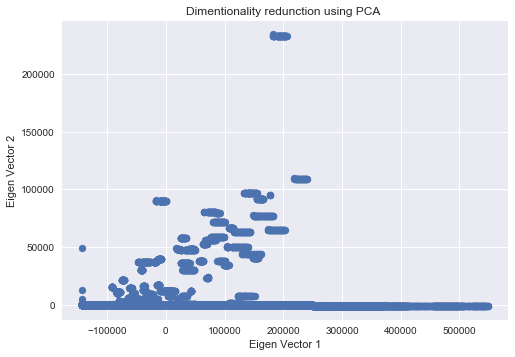

In [23]:
pca = PCA(n_components=2)
X = traning_feature
#To project the data into the first 2 eigen vectors
Y_sklearn =pca.fit_transform(X)
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1])
plt.xlabel("Eigen Vector 1")
plt.ylabel("Eigen Vector 2")
plt.title("Dimentionality redunction using PCA ")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[858558      1]
 [     0  38906]]
Accuracy: 99.999888575


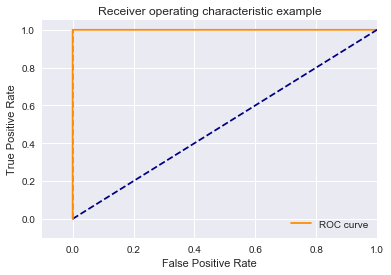

In [69]:
# Ramdom forest
def Random_forest_classification(training_feature, traning_label, testing_feature, testing_label):
    rf = RandomForestClassifier()

    # we create an instance of Neighbours Classifier and fit the data.
    rf.fit(training_feature, traning_label)
    z=rf.predict(testing_feature)
    cm=confusion_matrix(testing_label,z)
    confusionMatrixPrint(cm)
    fpr, tpr, _ = roc_curve(testing_label,z)
    result = np.sum(testing_label.values.flatten() == z)/z.size
    print("Accuracy:",result*100)
    plt.plot(fpr, tpr, color='darkorange',
              label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.plot([0, 0], [0, 1], color='darkorange',  linestyle='--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
Random_forest_classification(traning_feature, traning_label, testing_feature, testing_label)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[858555      4]
 [ 38473    433]]
Accuracy: 95.7127018881


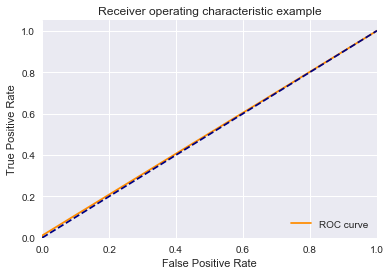

In [89]:
def Neural_net(training_feature, traning_label, testing_feature, testing_label):
    nn = MLPClassifier(solver='adam', alpha=1e-6,hidden_layer_sizes=(10, 2), random_state=3, max_iter=300,warm_start=True)

    # we create an instance of Neighbours Classifier and fit the data.
    nn.fit(training_feature, traning_label)
    z=nn.predict(testing_feature)
    print(confusion_matrix(testing_label,z))
    fpr, tpr, _ = roc_curve(testing_label,z)
    result = np.sum(testing_label.values.flatten() == z)/z.size
    print("Accuracy:",result*100)
    plt.plot(fpr, tpr, color='darkorange',
              label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
Neural_net(traning_feature, traning_label, testing_feature, testing_label)

Accuracy: 95.6252931764
Accuracy: 95.5745932905
Accuracy: 95.6055765541
Accuracy: 95.6285431691
Accuracy: 95.6287598353
Accuracy: 95.6169515285


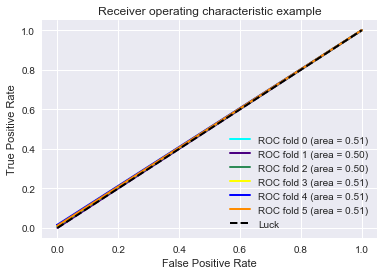

In [85]:
cv = StratifiedKFold(n_splits=6)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
X = pd.concat([traning_feature,testing_feature]).values
y = pd.concat([traning_label,testing_label]).values.flatten()
colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2
classifier = MLPClassifier(solver='adam', alpha=1e-4,hidden_layer_sizes=(10, 2), random_state=3)
i = 0
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    z=classifier.predict(traning_feature)
    result = np.sum(traning_label.values.flatten() == z)/z.size
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
cm=confusion_matrix(testing_label,z)
confusionMatrixPrint(cm)    
print("Accuracy:",result*100)
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()